1. Identify High-Performing Genres

In [17]:
import sqlite3

# Connect to the database (replace 'movies.db' with your database file)
conn = sqlite3.connect('im.db')

# Create a cursor object to execute SQL queries
cursor = conn.cursor()


In [18]:
import pandas as pd

# Run a SQL query and read the results into a DataFrame
query = "SELECT * , AVG(numvotes) as avg_Votes FROM movie_ratings GROUP BY movie_id HAVING avg_Votes > 100000"
df = pd.read_sql_query(query, conn)
print(df)
len(df)



      movie_id  averagerating  numvotes  avg_Votes
0    tt0359950            7.3    275300   275300.0
1    tt0365907            6.5    105116   105116.0
2    tt0369610            7.0    539338   539338.0
3    tt0398286            7.8    366366   366366.0
4    tt0401729            6.6    241792   241792.0
..         ...            ...       ...        ...
613  tt6823368            6.8    133793   133793.0
614  tt6857112            7.1    102511   102511.0
615  tt6966692            8.3    204972   204972.0
616  tt7349662            7.5    149005   149005.0
617  tt7784604            7.3    151571   151571.0

[618 rows x 4 columns]


618

In [19]:

# Load necessary tables into pandas DataFrames
movie_basics = pd.read_sql_query("SELECT movie_id, primary_title, genres FROM movie_basics", conn)
movie_ratings = pd.read_sql_query("SELECT movie_id, averagerating FROM movie_ratings", conn)



Top Genres by Average Rating:
         genres  averagerating
21        Short       8.800000
7   Documentary       7.332090
11    Game-Show       7.300000
17         News       7.271330
4     Biography       7.162274
14        Music       7.091972
12      History       7.040956
22        Sport       6.961493
24          War       6.584291
18   Reality-TV       6.500000


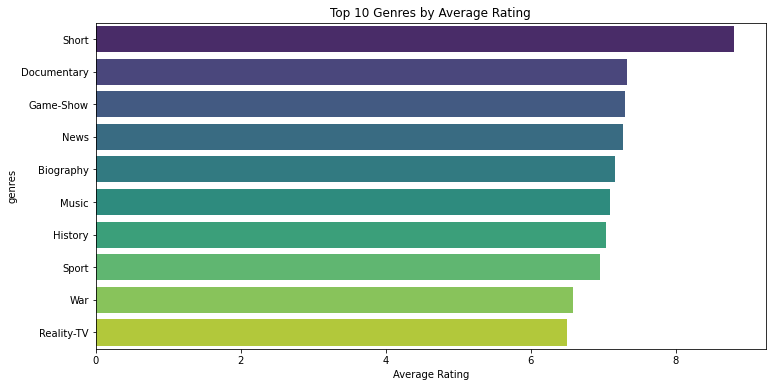

In [20]:
# Merge movie_basics and movie_ratings on 'movie_id'
movies = pd.merge(movie_basics, movie_ratings, on='movie_id')

# Drop rows with missing genres
movies = movies.dropna(subset=['genres'])

# Split genres and explode the DataFrame
movies['genres'] = movies['genres'].str.split(',')
movies_exploded = movies.explode('genres')

# Calculate average rating per genre
genre_ratings = movies_exploded.groupby('genres')['averagerating'].mean().reset_index()

# Sort genres by average rating
genre_ratings = genre_ratings.sort_values(by='averagerating', ascending=False)

print("Top Genres by Average Rating:")
print(genre_ratings.head(10))

#Plotting.
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(x='averagerating', y='genres', data=genre_ratings.head(10), palette='viridis')
plt.title('Top 10 Genres by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('genres')
plt.show()


2. Assess Box Office Success Using Pre-Release Attributes

In [26]:
# Load necessary tables into pandas DataFrames
movie_basics = pd.read_sql_query("SELECT movie_id, primary_title, genres, runtime_minutes FROM movie_basics", conn)
movie_ratings = pd.read_sql_query("SELECT movie_id, averagerating FROM movie_ratings", conn)

# Merge the tables on 'movie_id'
movies = pd.merge(movie_basics, movie_ratings, on='movie_id')

# Drop rows with missing values
movies = movies.dropna(subset=['genres', 'runtime_minutes', 'averagerating'])


In [27]:
# Split genres and explode the DataFrame
movies['genres'] = movies['genres'].str.split(',')
movies_exploded = movies.explode('genres')

# Calculate the number of movies per genre
genre_distribution = movies_exploded['genres'].value_counts().reset_index()
genre_distribution.columns = ['Genre', 'Movie Count']

print("Genre Distribution:")
print(genre_distribution.head(10))


Genre Distribution:
         Genre  Movie Count
0        Drama        28394
1  Documentary        16423
2       Comedy        15514
3     Thriller         7583
4       Horror         6917
5       Action         6297
6      Romance         5976
7        Crime         4338
8    Biography         3693
9    Adventure         3621


In [29]:
# Group by runtime and calculate average rating
runtime_performance = movies.groupby('runtime_minutes')['averagerating'].mean().reset_index()

# Sort by average rating
runtime_performance = runtime_performance.sort_values(by='averagerating', ascending=False)

print("Average Rating by Runtime:")
print(runtime_performance.head(10))


Average Rating by Runtime:
     runtime_minutes  averagerating
280            607.0           9.30
269            379.0           9.20
270            383.0           9.20
239            261.0           9.00
286           1440.0           8.90
273            467.0           8.90
231            247.0           8.85
203            207.0           8.80
268            364.0           8.70
249            287.0           8.70


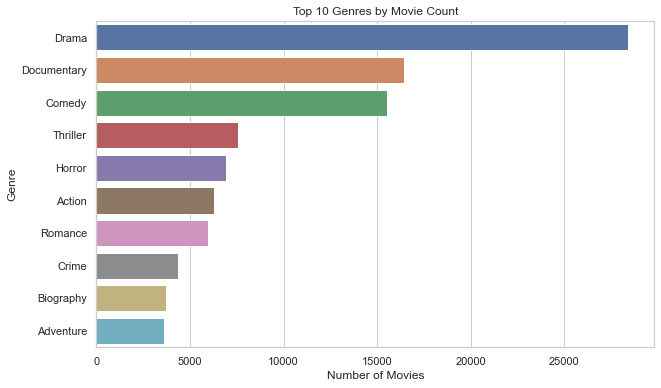

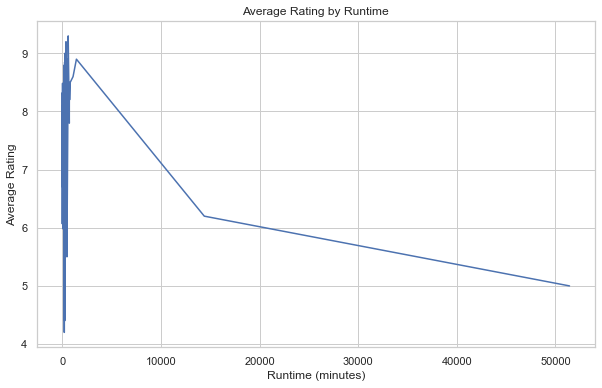

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style
sns.set(style="whitegrid")

# Plot genre distribution
plt.figure(figsize=(10, 6))
sns.barplot(x='Movie Count', y='Genre', data=genre_distribution.head(10))
plt.title('Top 10 Genres by Movie Count')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

# Plot average rating by runtime
plt.figure(figsize=(10, 6))
sns.lineplot(x='runtime_minutes', y='averagerating', data=runtime_performance)
plt.title('Average Rating by Runtime')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Average Rating')
plt.show()
